In [7]:
#Import numpy
import numpy as np
np.random.seed(123)  # for reproducibility

from matplotlib import pyplot as plt

In [8]:
#import requiered keras bits
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten

from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils

In [1]:
# load the mnist dataset

from keras.datasets import mnist

(X_train,Y_train),(X_test,Y_test) =mnist.load_data()

Using TensorFlow backend.


In [10]:
# look at the shape of the training data
X_train.shape

(60000, 28, 28)

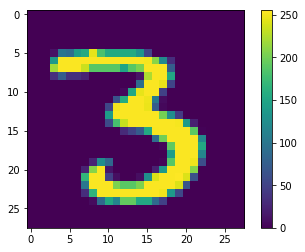

In [11]:
#plot one to visualise the data
plt.imshow(X_train[12])
plt.colorbar()

In [12]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
#reshape input data so that it states it only has a depth of 1, ie is only composed on one band
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


X_train = (X_train.astype('float32'))/255
X_test = (X_test.astype('float32'))/255

In [14]:

print(Y_train[:10])


[5 0 4 1 9 2 1 3 1 4]


In [15]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [16]:
Y_train.shape

(60000, 10)

In [17]:
#define a model
model = Sequential()

In [18]:
#add an input layer to the model
model.add(Convolution2D(32,(3,3),strides=(3,3), activation='relu', input_shape=(28,28,1)))


In [19]:
#add a second convolution layer and then maxpooling and dropout
model.add(Convolution2D(32,(3,3), strides=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [20]:
#add a fully connected layer and then an output layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#the 10 that we are using here relates to the 10 output classes. 

In [21]:
#here we compile. during complie you deifle your loss fuction and optimier. this take all added layers and compiles in to
#a useable model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
#acctually train the model on the data 
result = model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.8879 - acc: 0.7171
Epoch 2/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.5628 - acc: 0.8289
Epoch 3/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.4944 - acc: 0.8512
Epoch 4/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.4562 - acc: 0.8612
Epoch 5/10
60000/60000 [==============================] - 22s 358us/step - loss: 0.4360 - acc: 0.8682
Epoch 6/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.4118 - acc: 0.8751
Epoch 7/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.4109 - acc: 0.8759
Epoch 8/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.3947 - acc: 0.8800
Epoch 9/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.3896 - acc: 0.8828
Epoch 10/10
60000/60000 [==============================] - 26s 429us/step - loss: 

In [23]:
#score = model.evaluate(X_test,Y_test, verbose=0)

In [28]:
X_test.shape

(10000, 28, 28, 1)

In [25]:
prdictions = model.predict_classes(X_test)

In [27]:
prdictions.shape

(10000,)